<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [101]:
from google.colab import files
import io


In [102]:
df = pd.read_csv('result2.csv')

In [103]:
train=df.sample(frac=0.8)
test=df.sample(frac=0.2)

In [104]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

In [105]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

In [106]:
test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

In [91]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

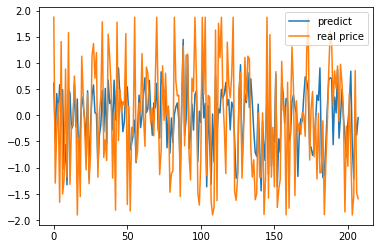

In [69]:
plt.plot(mlr.predict(x_test), label="predict")
y_t=y_test.reshape(-1,1)
plt.plot(y_test, label="real price")
plt.legend()

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 11, activation='relu'))
model.add(Dense(500,activation='sigmoid'))
model.add(Dense(300,activation='sigmoid'))
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(1))

In [108]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [109]:
hist=model.fit(x_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
26/26 [==============================] - 1s 10ms/step - loss: 1.1249 - mae: 0.8685
Epoch 2/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.7238 - mae: 0.6847
Epoch 3/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.6727 - mae: 0.6557
Epoch 4/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.6404 - mae: 0.6367
Epoch 5/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.6264 - mae: 0.6207
Epoch 6/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.6071 - mae: 0.6132
Epoch 7/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.6119 - mae: 0.6151
Epoch 8/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.5945 - mae: 0.6067
Epoch 9/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.6036 - mae: 0.6105
Epoch 10/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.5891 - mae: 0.6063
Epoch 11/1000
26/26 [==================

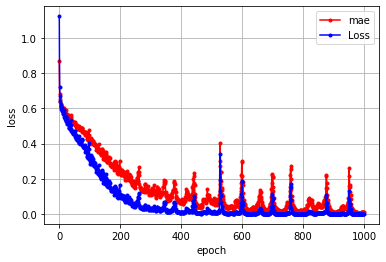

In [115]:
y_acc = hist.history['mae']
y_loss = hist.history['loss']#x_len = np.arange(len(y_loss)) 
x_len = np.arange(1000)
plt.plot(x_len, y_acc[:1000], marker='.', c='red', label="mae")
plt.plot(x_len, y_loss[:1000], marker='.', c='blue', label="Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [111]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[1.124851107597351, 0.7238389849662781, 0.6727150082588196, 0.6403933763504028, 0.6263670325279236, 0.6071079969406128, 0.6118947863578796, 0.5945107936859131, 0.6036263704299927, 0.5891029238700867, 0.5872617363929749, 0.5735471844673157, 0.5858314037322998, 0.5688191652297974, 0.5903922319412231, 0.5718929171562195, 0.5516763925552368, 0.5751112103462219, 0.551849365234375, 0.5409836173057556, 0.543904721736908, 0.5564972758293152, 0.5300232172012329, 0.5305529236793518, 0.5179762244224548, 0.5118669271469116, 0.543258786201477, 0.522886335849762, 0.5199854373931885, 0.5218536853790283, 0.516223669052124, 0.49761173129081726, 0.490218847990036, 0.4890945255756378, 0.4855738580226898, 0.508679986000061, 0.4995482265949249, 0.4695137143135071, 0.5073031783103943, 0.5367195010185242, 0.4859532415866852, 0.4719758629798889, 0.4695546329021454, 0.46735942363739014, 0.4633331596851349, 0.4552651345729828, 0.4599931538105011, 0.4550454616546631, 0.474065661430358

In [113]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 3ms/step - loss: 0.1516 - mae: 0.1494
## evaluation loss and_metrics ##
[0.1515929400920868, 0.14942780137062073]


In [114]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)
print(y_test[0:1])

## yhat ##
[[-0.40124843]]
[-0.39397033]
